<a href="https://colab.research.google.com/github/akmal1994/Online_Retail_customer_segment/blob/main/Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Online Retail Customer Segmentation

##### **Project Type**    - Unsupervised Learning
##### **Contribution**    - Individual
##### **Team Member**     - Akmal Jah Quamri

# **Project Summary -**
Customer segmentation is the process by which you divide your customers up based on common characteristics – such as demographics or behaviors, so you can market to those customers more effectively. These customer segmentation groups can also be used to begin discussions of building a marketing persona. This is because customer segmentation is typically used to inform a brand’s messaging, positioning and to improve how a business sells – so marketing personas need to be closely aligned to those customer segments in order to be effective.

# **GitHub Link -**
https://github.com/akmal1994/Bike-Rental-count/blob/main/Retail_Customer_Segmentation.ipynb

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
data = pd.read_excel('/content/drive/MyDrive/Alma Better/0. Capstone Projects/Unsupervised Learning/Online Retail.xlsx')
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

# Basic Exploratory Data Analysis

## Statistical Analysis

In [ ]:
# To check the number of rows and columns of our dataset
data.shape

(541909, 8)

**Our dataset is having 541909 rows and 8 columns**

---

In [ ]:
# To check the complete information about dataset such as: types of columns, name of columns, non-null counts for each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Here we can see that column `CustomerID` is having 406829 values and `Description` with 540455 values, apart from this every column is having 0 non-null values.**

---

In [ ]:
# To check the null values percent for each columns
df = data.copy()
((df.isna().sum())/len(df))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

**`CustomerID` have 25 percent of null values and `Description` have 0.27 percent of null values. Now here I want to know whether all null values in `Description` is correspond with null values of `CustomerID` or not.**

---

In [ ]:
non_null = df[df['CustomerID'].notna()]
((non_null.isna().sum())/len(non_null))*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

**When we checked the null values after omitting the rows having null values in `CustomerID` column, we observed that `Description` column with null values are also covered.**

---

In [ ]:
non_null.shape

(406829, 8)

**We have now 406829 rows and 8 columns**

In [ ]:
non_null.duplicated().sum()

5225

**We can see that their are many duplicate rows as well. Let's do a check for dkuplicates now**

In [ ]:
# we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation
non_null['InvoiceNo'] = non_null['InvoiceNo'].astype('str')
new_data=non_null[~non_null['InvoiceNo'].str.contains('C')] # Create a new dataset

# After removing cancellation data let's check duplicate rows in new dataset
new_data.duplicated().sum()

5192

**After removing cancellation datapoints we still have duplicate datapoints in our dataset.**

In [ ]:
# Keep all the records for non duplicate data points in a new variable
clear_data = new_data[~new_data.duplicated()]
clear_data.duplicated().sum()

0

**Now we have clear dataset with zero null values, zero duplicates and no cancellation records.**

In [ ]:
# Data Summarizing
clear_data.describe().T

count          mean          std      min       25%       50%  \
Quantity    392732.0     13.153718   181.588420      1.0      2.00      6.00   
UnitPrice   392732.0      3.125596    22.240725      0.0      1.25      1.95   
CustomerID  392732.0  15287.734822  1713.567773  12346.0  13955.00  15150.00   

                 75%       max  
Quantity       12.00  80995.00  
UnitPrice       3.75   8142.75  
CustomerID  16791.00  18287.00

**OBSERVATIONS:**

* if we see `Quantity` and `UnitPrice` column then we can see that at 75th percentile value is 12 and 3.75, however at maximum values are 80995 and 8142. With this possibly there might be outliers with this columns.

## Feature Extraction

In [ ]:
# Before moving ahead let's extract day, month, year, hours and minutes from datetime columns.
clear_data['Day']=clear_data['InvoiceDate'].dt.day_name()
clear_data['Month']=clear_data['InvoiceDate'].dt.month_name()
clear_data['Year']=clear_data['InvoiceDate'].dt.year
clear_data['Hour']=clear_data['InvoiceDate'].dt.hour
clear_data['Minute']=clear_data['InvoiceDate'].dt.minute

clear_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   

      Month  Year  Hour  Minute  
0  December  2010     8      26  
1  December  2010     8      26  
2  December  2010     8      26  
3  December  2010     8      26  
4  December  2010     8      26

In [ ]:
clear_data['total_amount'] = clear_data['UnitPrice'] * clear_data['Quantity']

## Visual Inspection / Representation

In this section we will try to plot different graphs and if required any operations we will try to do.

In [ ]:
# Creating a dataframe for the count of products with name
data_desc=clear_data['Description'].value_counts().reset_index()
data_desc.rename(columns={'index': 'Description_Name', 'Description': 'Count'}, inplace=True)
data_desc.sort_values(by='Count', ascending=False)
data_desc.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1714
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1390

In [ ]:
# Create a function to plot
def plot(x, y, df, num1, num2, title_name):
  plt.figure(figsize=(18,11))
  plt.title(title_name)
  sns.barplot(x=x,y=y,data=df[num1:num2])

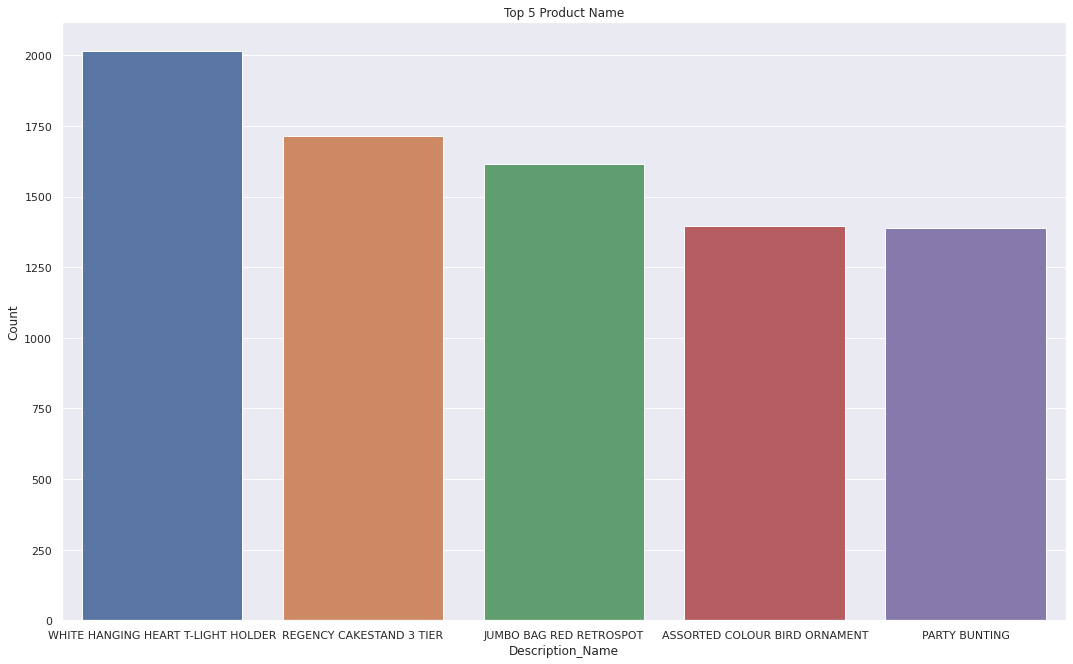

In [ ]:
# Plot top 5 product based on maximum selling
plot('Description_Name', 'Count', data_desc, 0, 5, 'Top 5 Product Name')

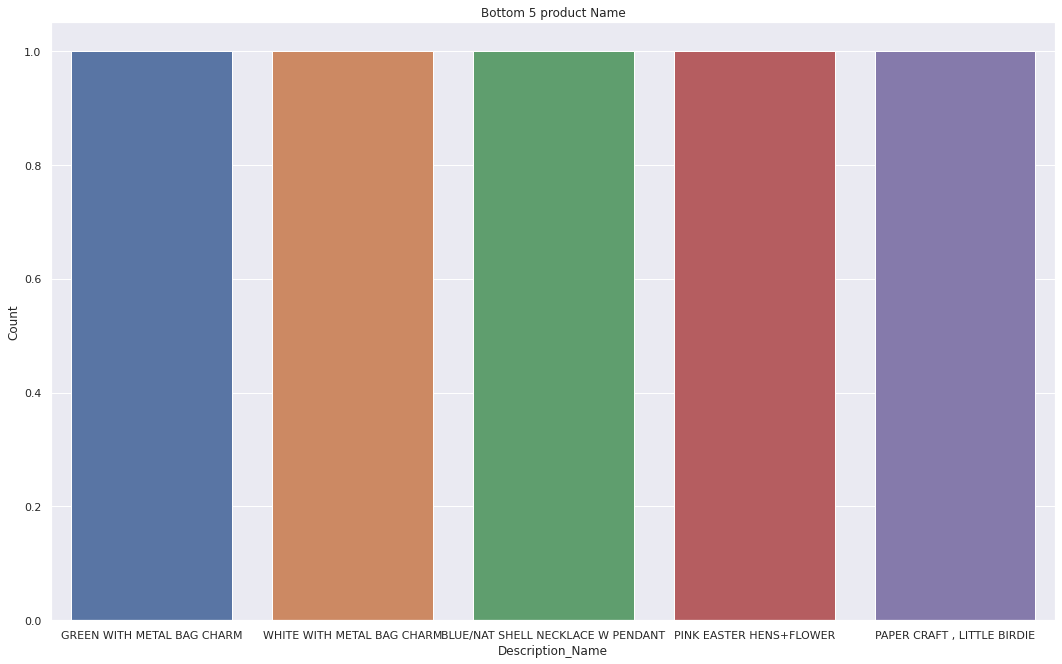

In [ ]:
# Plot graph for 5 least selling product 
plot(x='Description_Name', y='Count', df=data_desc, num1=-5, num2=len(data_desc), title_name='Bottom 5 product Name')

**Top 5 Selling Products**
* WHITE HANGING HEART T-LIGHT HOLDER
* REGENCY CAKESTAND 3 TIER
* JUMBO BAG RED RETROSPOT
* ASSORTED COLOUR BIRD ORNAMENT
* PARTY BUNTING

**Least 5 Selling Products**
* GREEN WITH METAL BAG CHARM
* WHITE WITH METAL BAG CHARM
* BLUE/NAT SHELL NECKLACE W PENDANT
* PINK EASTER HENS+FLOWER
* PAPER CRAFT , LITTLE BIRDIE

In [ ]:
# Create dataframe for analysis of stocks
data_stock=clear_data['StockCode'].value_counts().reset_index()
data_stock.rename(columns={'index': 'Stock_Code', 'StockCode': 'Count'}, inplace=True)
data_stock.head()

Stock_Code  Count
0     85123A   2023
1      22423   1714
2     85099B   1615
3      84879   1395
4      47566   1390

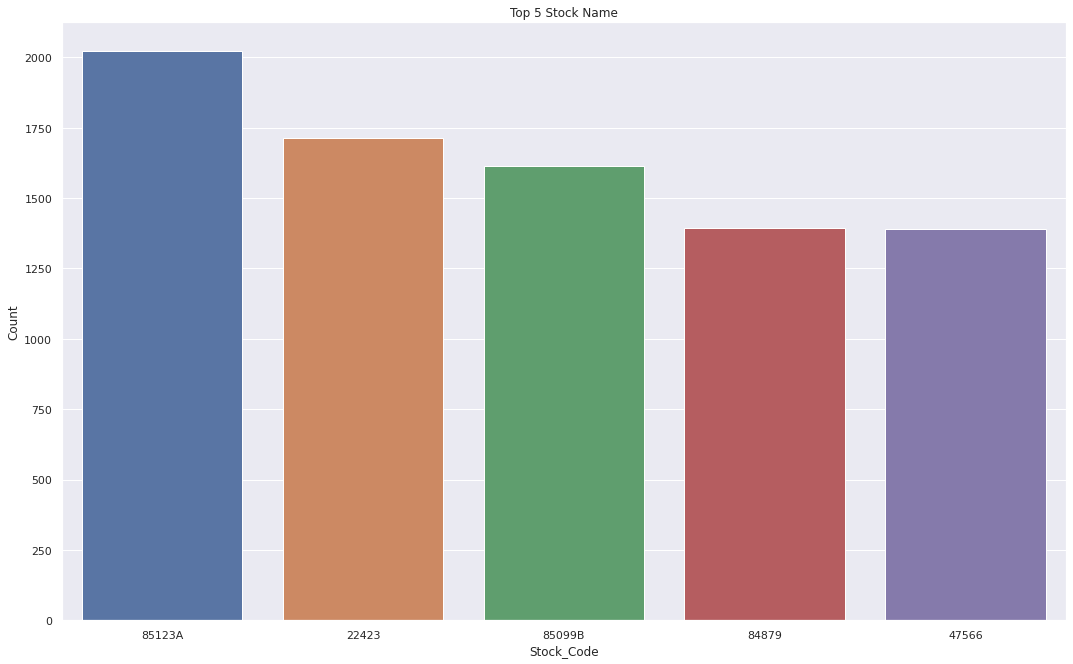

In [ ]:
# Top 5 Stocks Plot
plot(x='Stock_Code', y='Count', df=data_stock, num1=0, num2=5, title_name='Top 5 Stock Name')

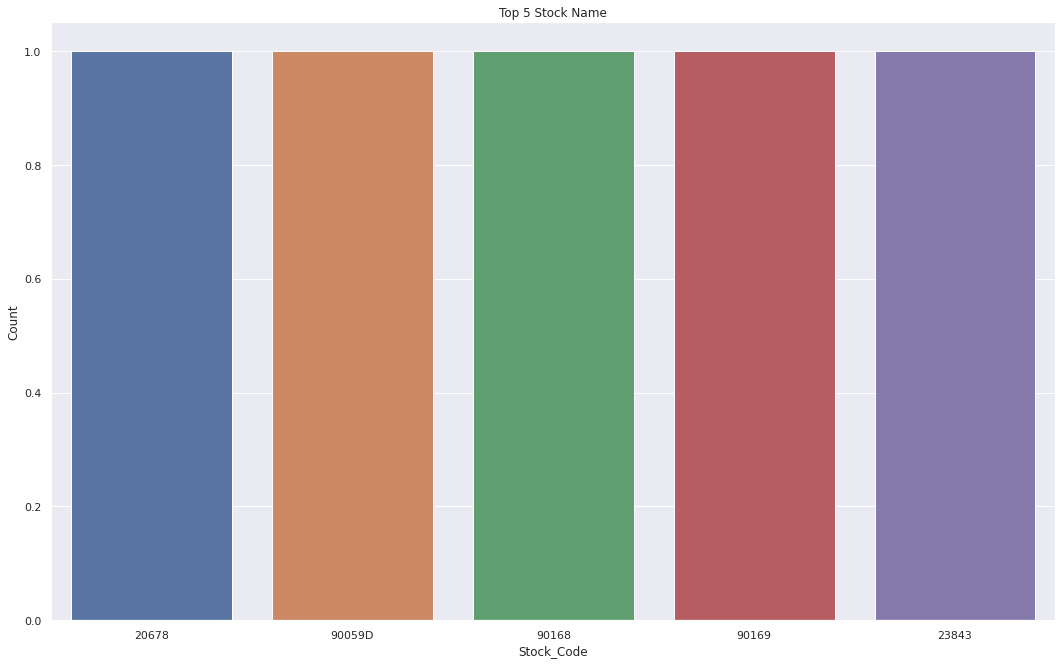

In [ ]:
# Least 5 stocks
plot(x='Stock_Code', y='Count', df=data_stock, num1=-5, num2=len(data_stock), title_name='Top 5 Stock Name')

**Top 5 Stocks**
* 85123A
* 22423
* 85099B
* 84879
* 47566

**Least 5 Stocks**
* 20678
* 90059D
* 90168
* 90169
* 23843

In [ ]:
# Create dataframe for analysis of Country
data_loc=clear_data['Country'].value_counts().reset_index()
data_loc.rename(columns={'index': 'Country_Name', 'Country': 'Count'}, inplace=True)
data_loc.sort_values(by='Count', ascending=False)
data_loc.head()

Country_Name   Count
0  United Kingdom  349227
1         Germany    9027
2          France    8327
3            EIRE    7228
4           Spain    2480

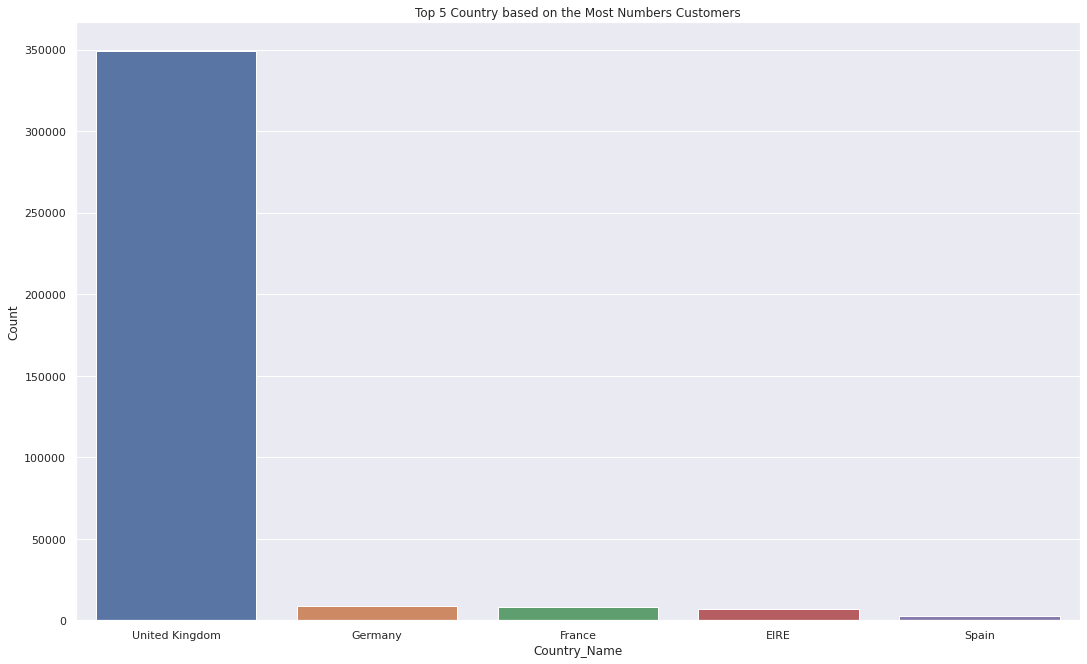

In [ ]:
# Top 5 Countris of maximum number of customers
plot('Country_Name', 'Count', data_loc, 0, 5, 'Top 5 Country based on the Most Numbers Customers')

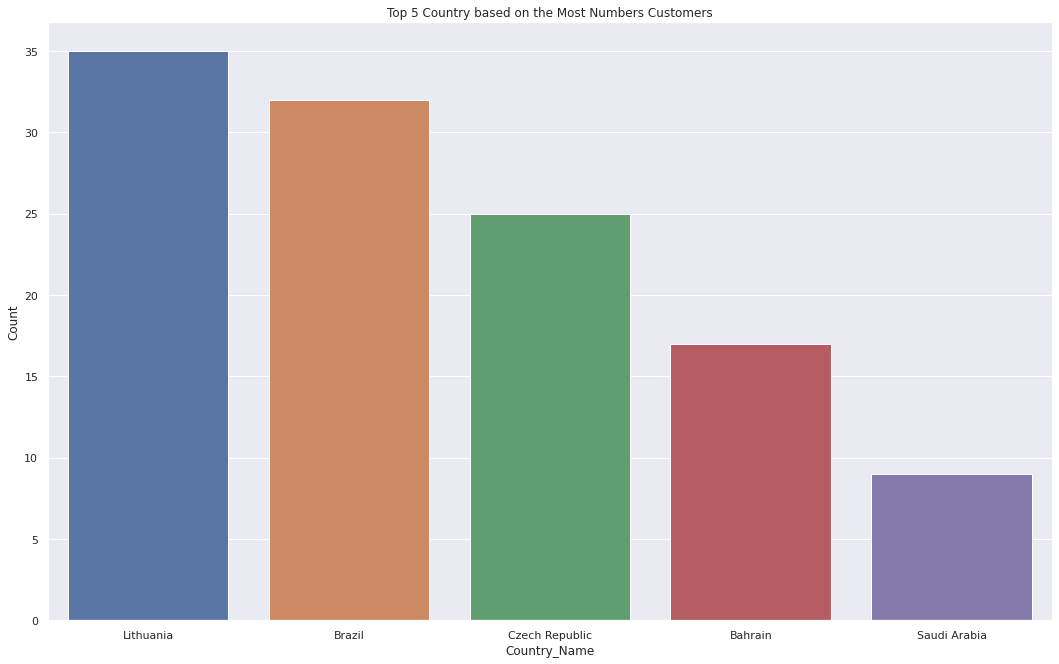

In [ ]:
# Countries with minimum customers
plot('Country_Name', 'Count', data_loc, -5, len(data_loc), 'Top 5 Country based on the Most Numbers Customers')

In [ ]:
# Doing some analysis on United Kingdom customers
uk = clear_data[clear_data['Country']=='United Kingdom']
uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   

      Month  Year  Hour  Minute  total_amount  
0  December  2010     8      26         15.30  
1  December  2010     8      26         20.34  
2  December  2010     8      26         22.00  
3  December  2010     8      26         20.34  
4  December  2010     8      26         20.34

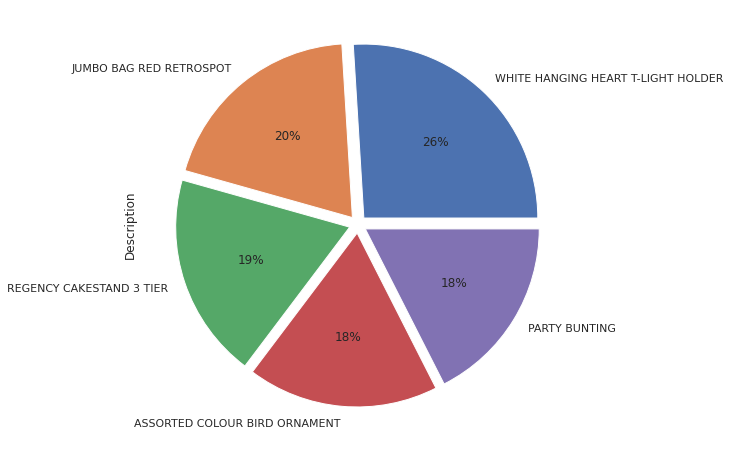

In [ ]:
# To check the most selling product in united kingdom
uk.Description.value_counts()[:5].plot(kind='pie', figsize=(8,8), autopct='%1.0f%%', explode=(0.05,0.05,0.05,0.05,0.05))

In United Kingdom WHITE HEARD T-LIGHT HOLDER product is highest choice for customer with 26%. whereas PARTY BUNTING and ASSORTED COLOUR BIRD ORNAMENT with 18% is lowest.

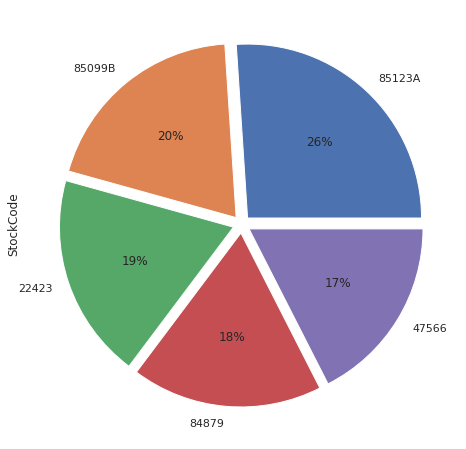

In [ ]:
# To check the most stocks in united kingdom
uk.StockCode.value_counts()[:5].plot(kind='pie', figsize=(8,8), autopct='%1.0f%%', explode=(0.05,0.05,0.05,0.05,0.05))

* Most selling stock code is 85123A with 26%
* Less selling stock code is 47566 with 17%

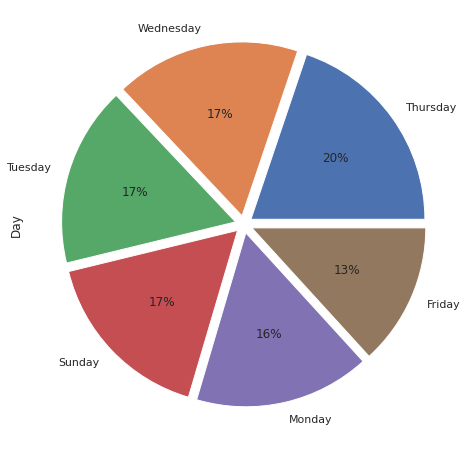

In [ ]:
# To check the day's for purchase in united kingdom
uk.Day.value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.0f%%', explode=(0.05,0.05,0.05,0.05,0.05,0.05))

* Thursday with maximum percent of record value 20%
* Friday with 13% at lowest place

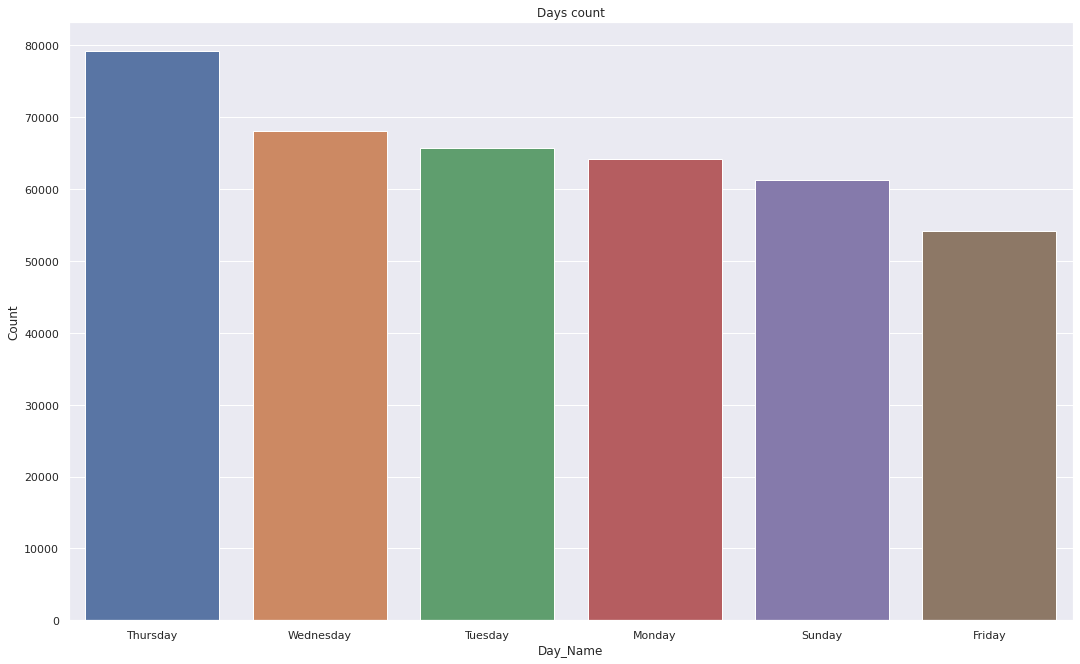

In [ ]:
# to check the number of days for purchase
data_day=clear_data['Day'].value_counts().reset_index()
data_day.rename(columns={'index': 'Day_Name', 'Day': 'Count'}, inplace=True)
plot('Day_Name', 'Count', data_day, 0, len(data_day), 'Days count')

**Most of the customers have purches the items in Thursday ,Wednesday and Tuesday**

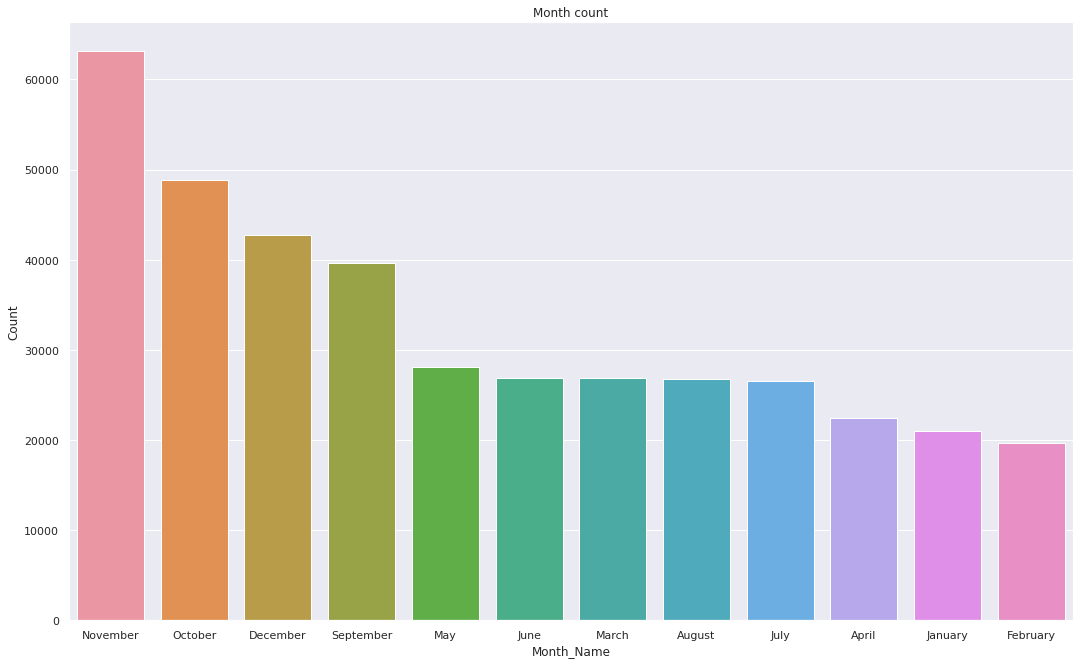

In [ ]:
# To check the number of month used for purchase
data_month=clear_data['Month'].value_counts().reset_index()
data_month.rename(columns={'index': 'Month_Name', 'Month': 'Count'}, inplace=True)
plot('Month_Name', 'Count', data_month, 0, len(data_month), 'Month count')

* most numbers of customers have purches the gifts in the month of November ,October and December September
* Less numbers of customers have purches the gifts in the month of April ,january and February

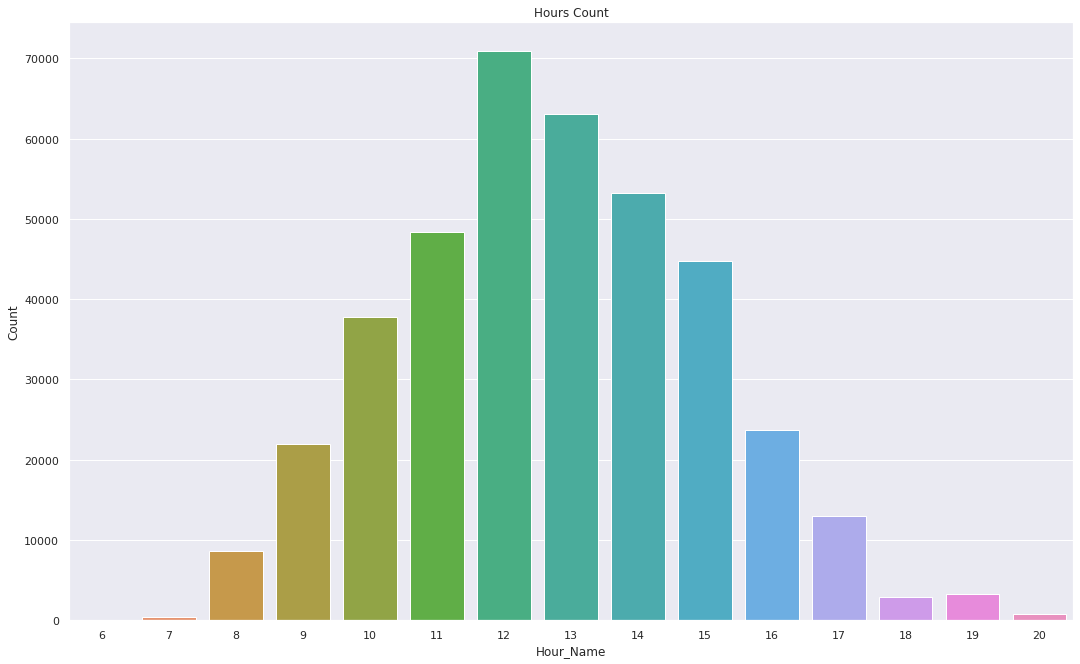

In [ ]:
data_hour=clear_data['Hour'].value_counts().reset_index()
data_hour.rename(columns={'index': 'Hour_Name', 'Hour': 'Count'}, inplace=True)
plot('Hour_Name', 'Count', data_hour, 0, len(data_hour), 'Hours Count')

From this graph we can see that in AfterNone Time most of the customers have purches the item.

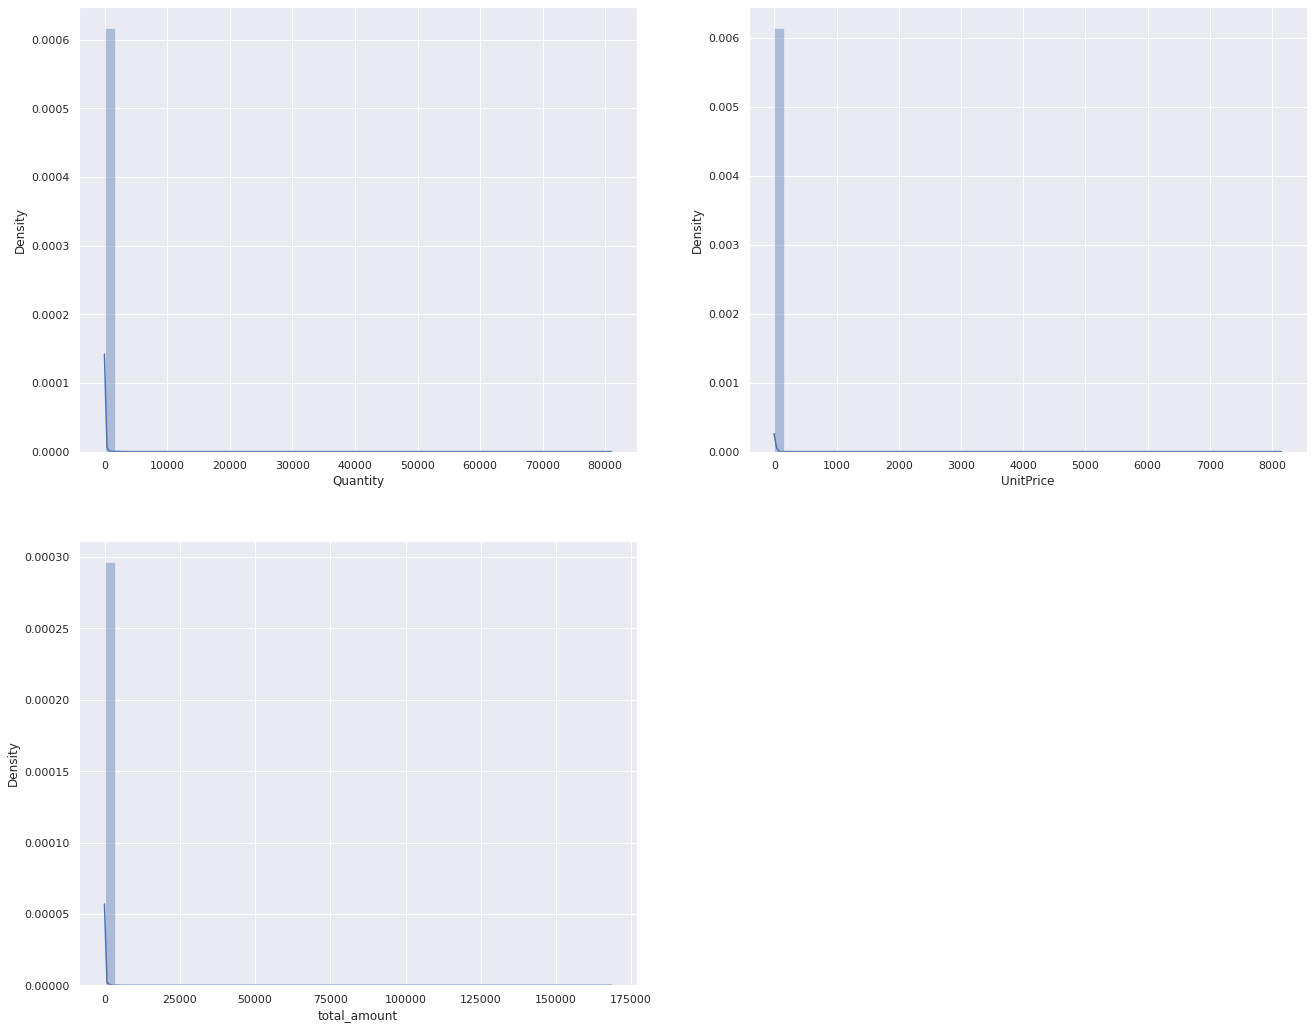

In [ ]:
# Plot graph to see the distribution
cont_cols = ['Quantity', 'UnitPrice', 'total_amount']
plt.figure(figsize=(22,18))

for num,col in enumerate(cont_cols):
    plt.subplot(2,2,num+1)
    sns.distplot(clear_data[col], kde=True)

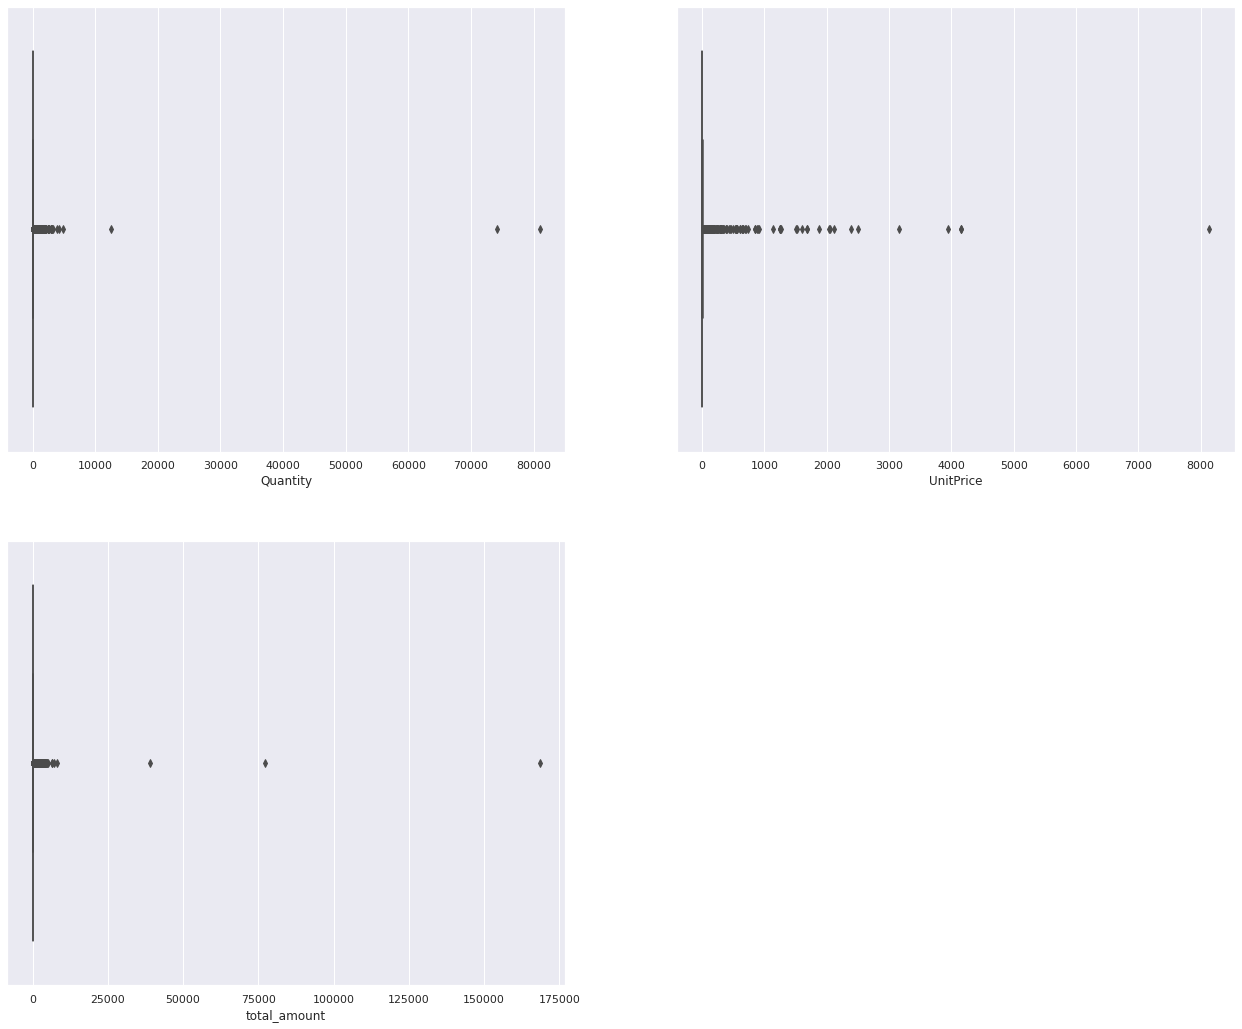

In [ ]:
# Plot graph to see the distribution
cont_cols = ['Quantity', 'UnitPrice', 'total_amount']
plt.figure(figsize=(22,18))

for num,col in enumerate(cont_cols):
    plt.subplot(2,2,num+1)
    sns.boxplot(clear_data[col])

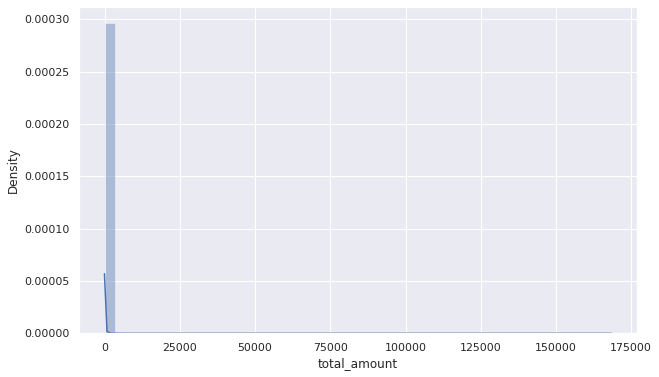

In [ ]:
# Distribution plot for Quantity feature
plt.figure(figsize=(10,6))
sns.distplot(clear_data['total_amount'], kde=True)

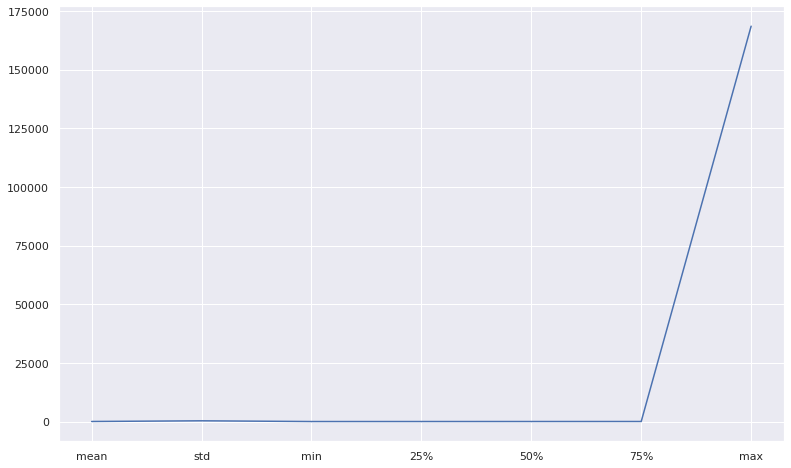

In [ ]:
plt.figure(figsize=(13,8))
clear_data['total_amount'].describe()[1:].plot()

#**Create the RFM model (Recency, Frequency,Monetary value)**

###Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

###Performing RFM Segmentation and RFM Analysis, Step by Step
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ...
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.

###Calculating RFM scores

The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, the higher the RFM score, the more valuable the customer.

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = clear_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'total_amount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'total_amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

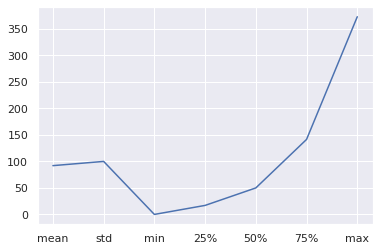

In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()[1:].plot()

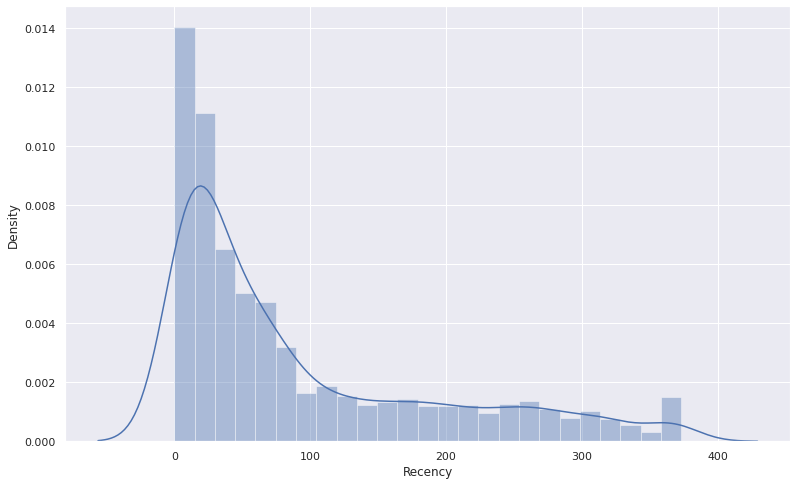

In [ ]:
plt.figure(figsize=(13,8))
sns.distplot(rfm_df['Recency'])

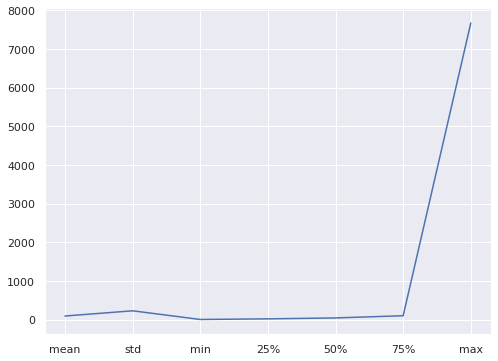

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()[1:].plot(figsize=(8,6))

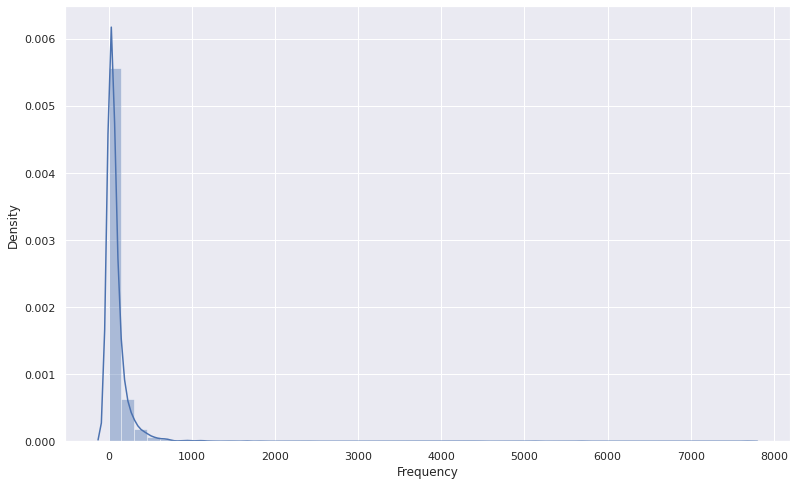

In [ ]:
plt.figure(figsize=(13,8))
sns.distplot(rfm_df['Frequency'])

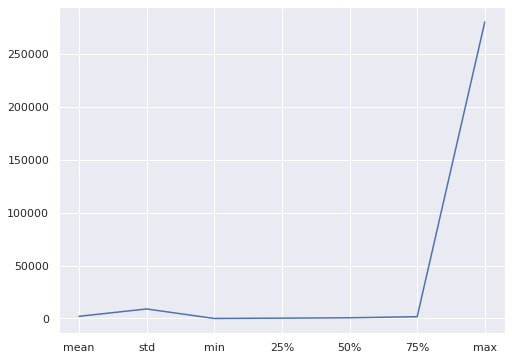

In [ ]:
rfm_df.Monetary.describe()[1:].plot(figsize=(8,6))

#**Split into four segments using quantiles**

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [ ]:

#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

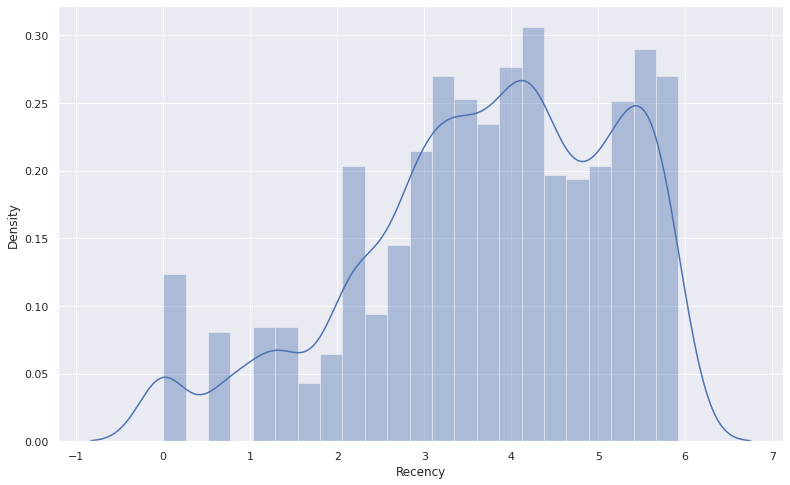

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

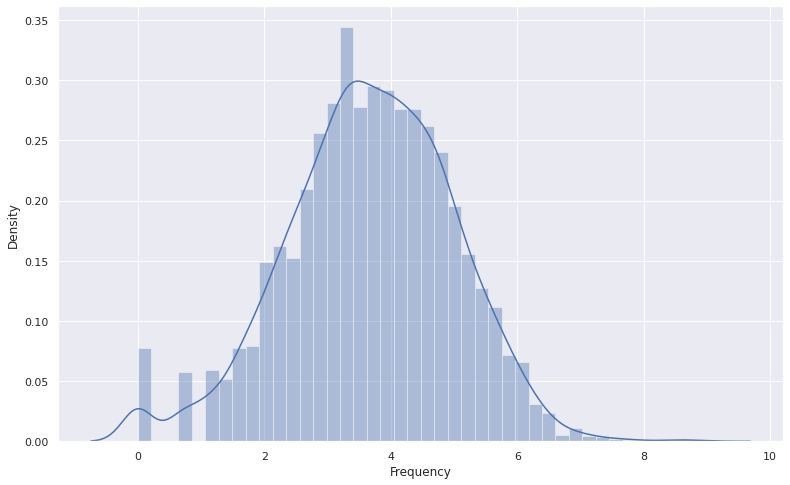

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

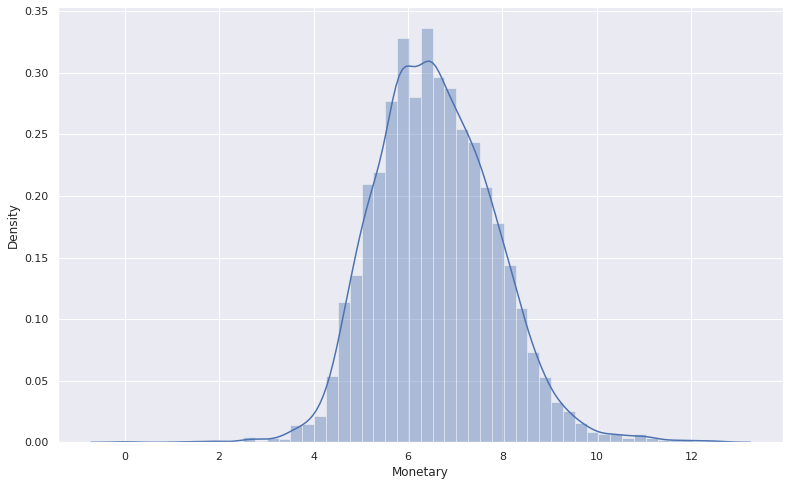

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

#**K-Means Clustering**

#**Applying Silhouette Score Method on Recency and Monetary**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42043960957985754
For n_clusters = 3, silhouette score is 0.34262730050733475
For n_clusters = 4, silhouette score is 0.36465622088328054
For n_clusters = 5, silhouette score is 0.3346086711138936
For n_clusters = 6, silhouette score is 0.34379507281992383
For n_clusters = 7, silhouette score is 0.3453891506418965
For n_clusters = 8, silhouette score is 0.3391378264914011
For n_clusters = 9, silhouette score is 0.3450980840111421
For n_clusters = 10, silhouette score is 0.34590207009517093
For n_clusters = 11, silhouette score is 0.3374253732265836
For n_clusters = 12, silhouette score is 0.3438324519062483
For n_clusters = 13, silhouette score is 0.338576459812195
For n_clusters = 14, silhouette score is 0.34048462269129776
For n_clusters = 15, silhouette score is 0.33483116412725655


#**Applying Elbow Method on Recency and Monetary**


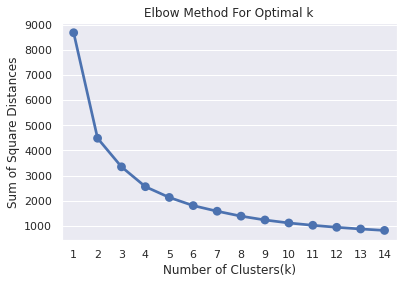

In [ ]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

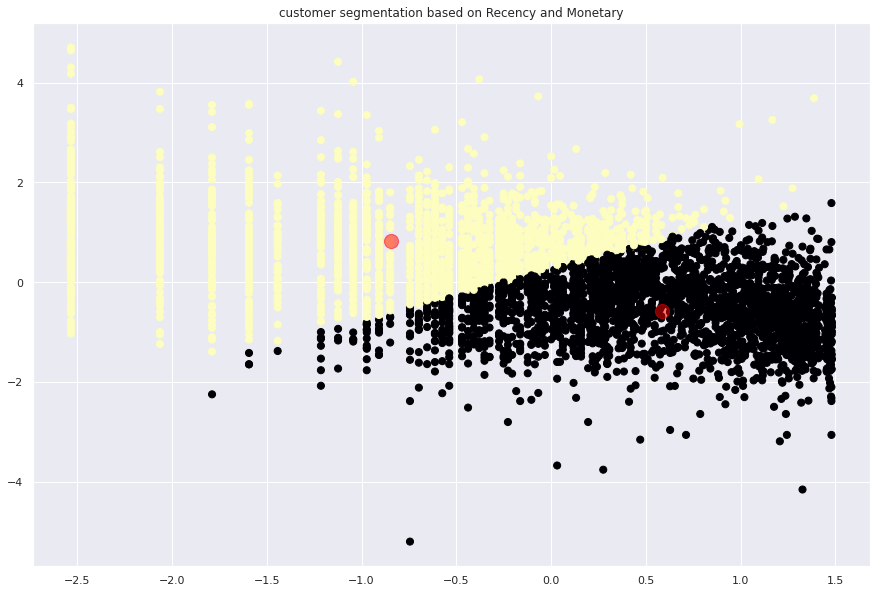

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='magma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

###**we see that ,Customers are well separate when we cluster them by Recency and Monetary**

#**Applying DBSCAN  on Recency and Monetary**

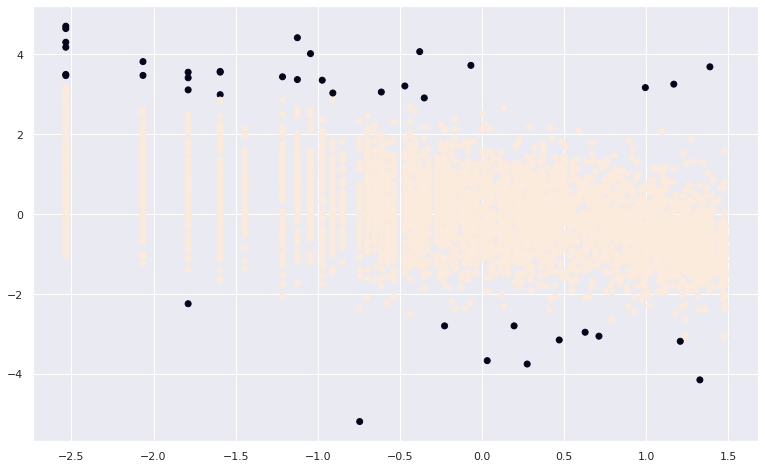

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

###**we see that ,Customers are well separate when we cluster them by Recency and Monetary**

#**Applying silhouette Score  Method on Frquency and Monetary**

In [ ]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4784449168854935
For n_clusters = 3, silhouette score is 0.40770991113651806
For n_clusters = 4, silhouette score is 0.3723618458780012
For n_clusters = 5, silhouette score is 0.34686254316981785
For n_clusters = 6, silhouette score is 0.36232010394085395
For n_clusters = 7, silhouette score is 0.3438523289050929
For n_clusters = 8, silhouette score is 0.3529764037216804
For n_clusters = 9, silhouette score is 0.3460254303742333
For n_clusters = 10, silhouette score is 0.3604357571644376
For n_clusters = 11, silhouette score is 0.36661097139122306
For n_clusters = 12, silhouette score is 0.35441768059429307
For n_clusters = 13, silhouette score is 0.36382505384083785
For n_clusters = 14, silhouette score is 0.3537420369920761
For n_clusters = 15, silhouette score is 0.343800324871718


#**Applying Elbow Method on Frequency and Monetary**


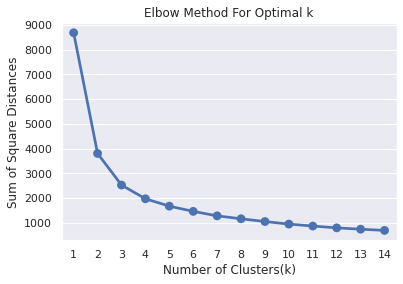

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

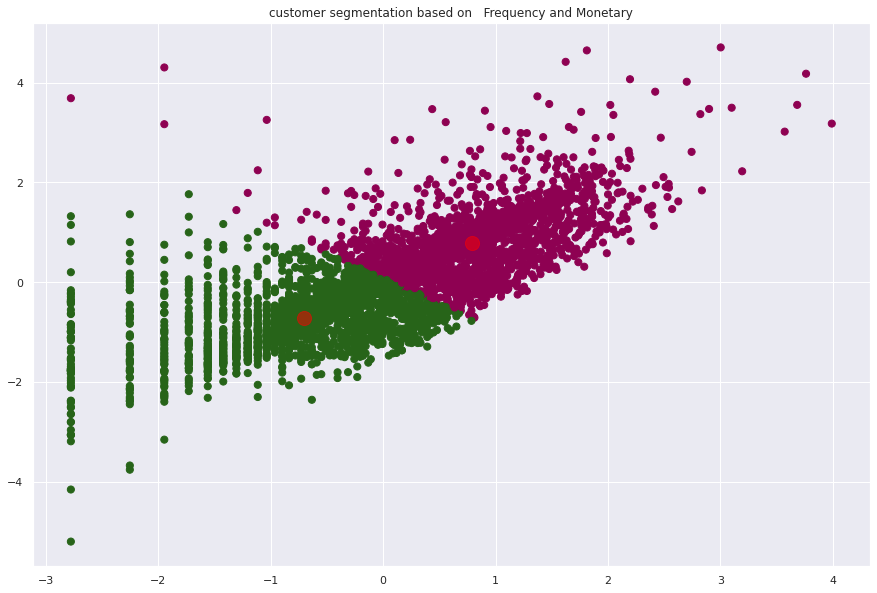

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

###**we see that ,Customers are well separate when we cluster them by Frequency and Monetary**

#**Applying DBSCAN to Method on Frquency and Monetary**

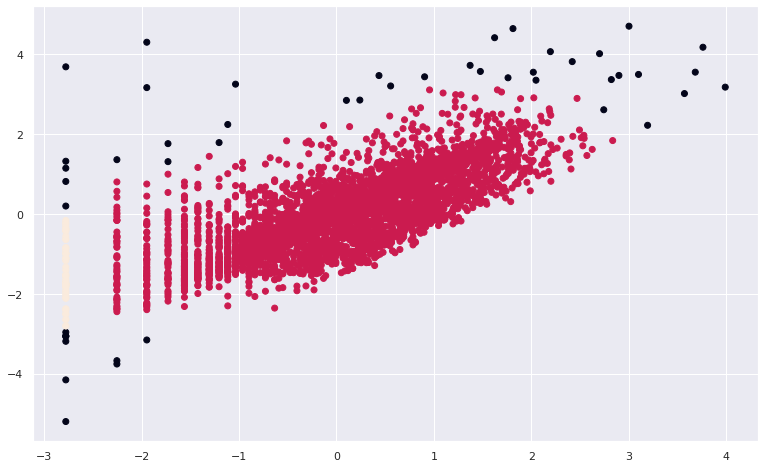

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

##**we see that ,Customers are well separate when we cluster them by Frequency and Monetary**

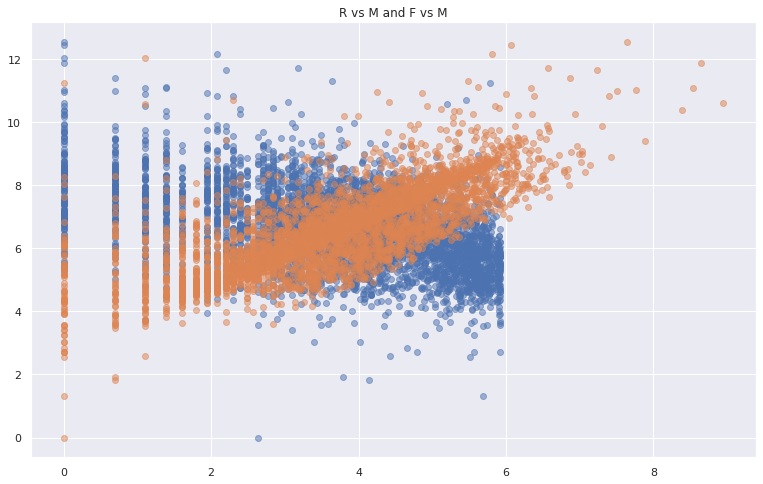

In [ ]:
plt.figure(figsize=(13,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

#**3D visualization of Recency ,Frequency and Monetary**

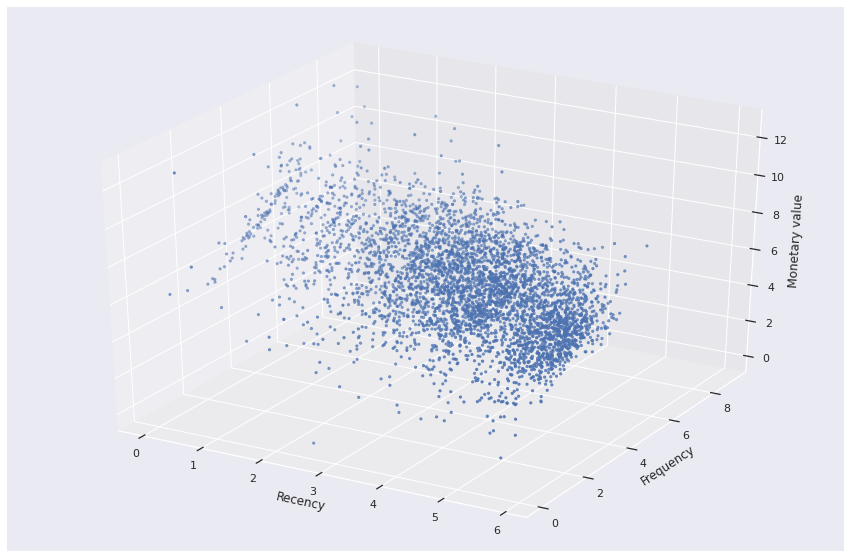

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,10))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency_log
ys=rfm_df.Frequency_log
zs=rfm_df.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

#**Applying Silhouette  Method on Recency ,Frequency and Monetary**

In [ ]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.395588261083924
For n_clusters = 3 The average silhouette_score is : 0.3056346992700891
For n_clusters = 4 The average silhouette_score is : 0.30270317426951315
For n_clusters = 5 The average silhouette_score is : 0.2792460561657022
For n_clusters = 6 The average silhouette_score is : 0.27920490924462127
For n_clusters = 7 The average silhouette_score is : 0.26639589282641335
For n_clusters = 8 The average silhouette_score is : 0.26439181568270587
For n_clusters = 9 The average silhouette_score is : 0.2530950678302339
For n_clusters = 10 The average silhouette_score is : 0.2523587969335804
For n_clusters = 11 The average silhouette_score is : 0.26053571388536995
For n_clusters = 12 The average silhouette_score is : 0.2658660395456048
For n_clusters = 13 The average silhouette_score is : 0.2633746937000211
For n_clusters = 14 The average silhouette_score is : 0.25492771945211434
For n_clusters = 15 The average silhouette_score is : 

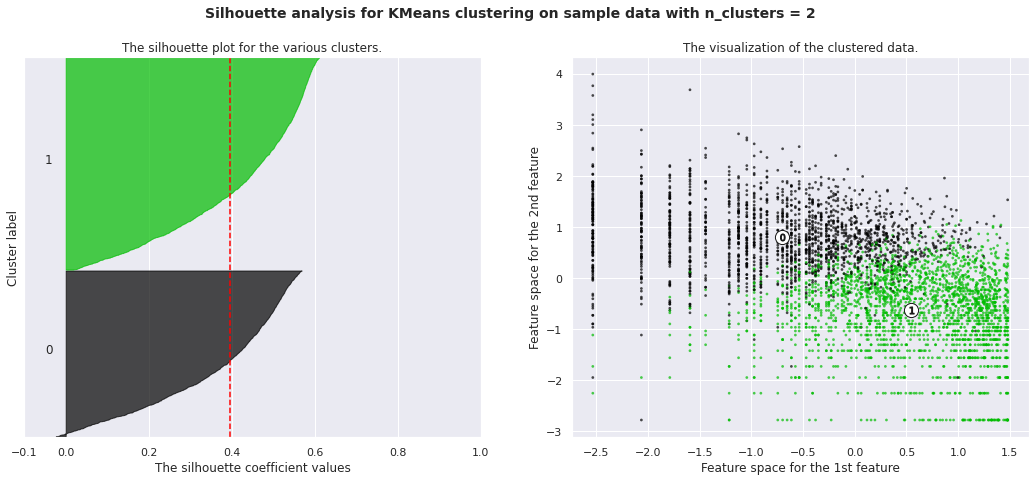

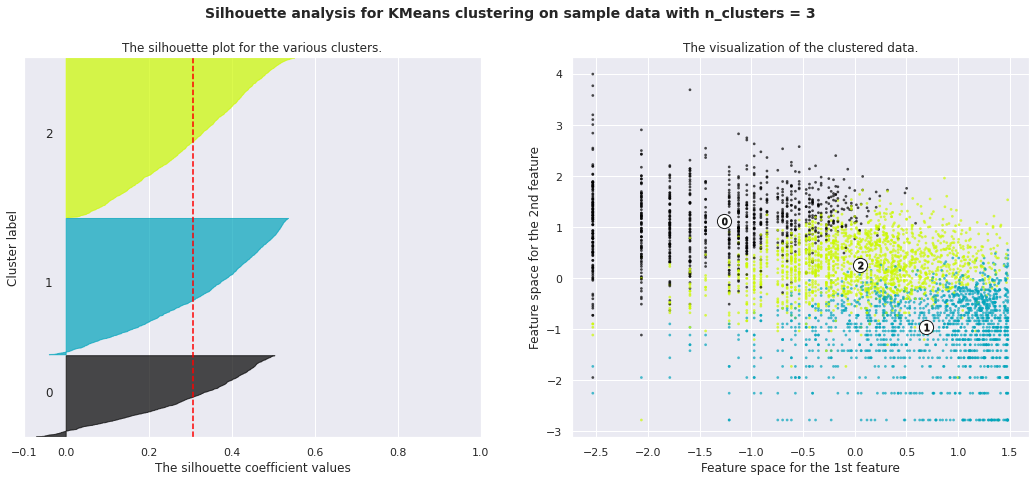

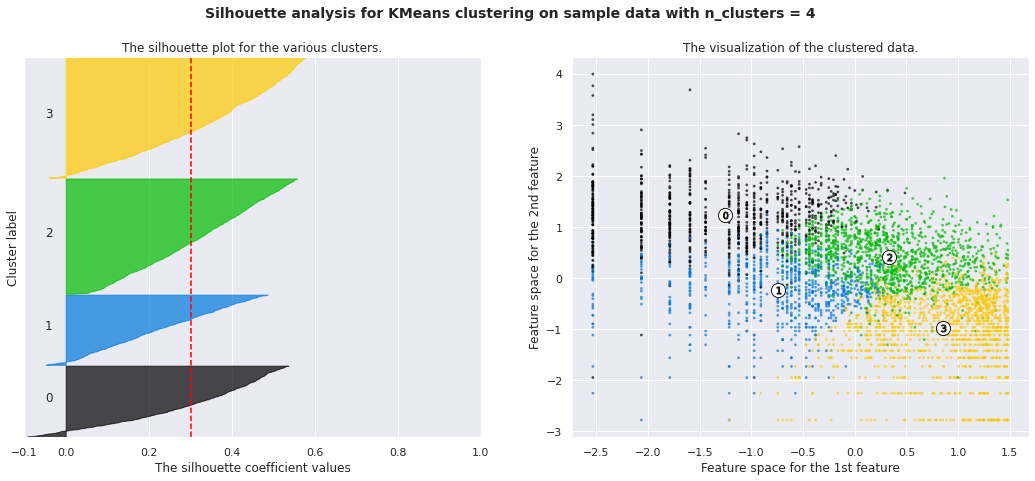

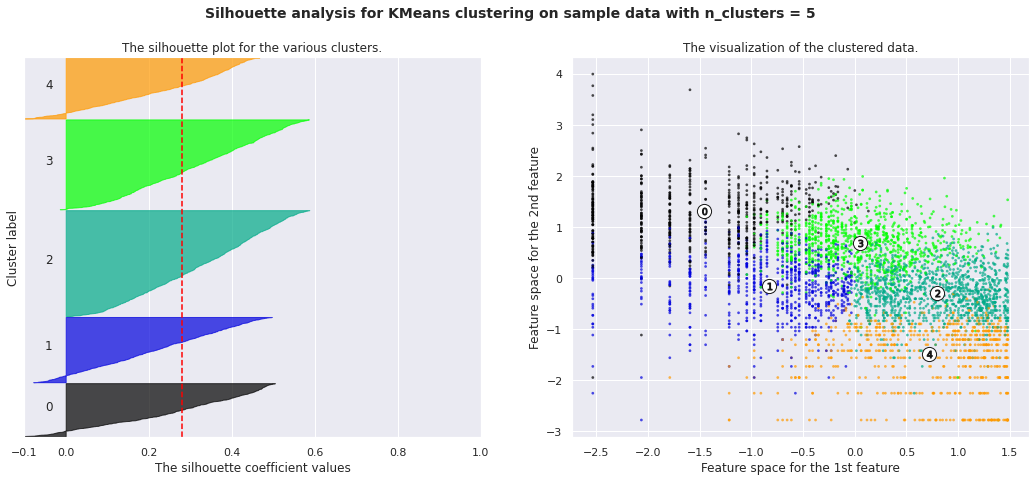

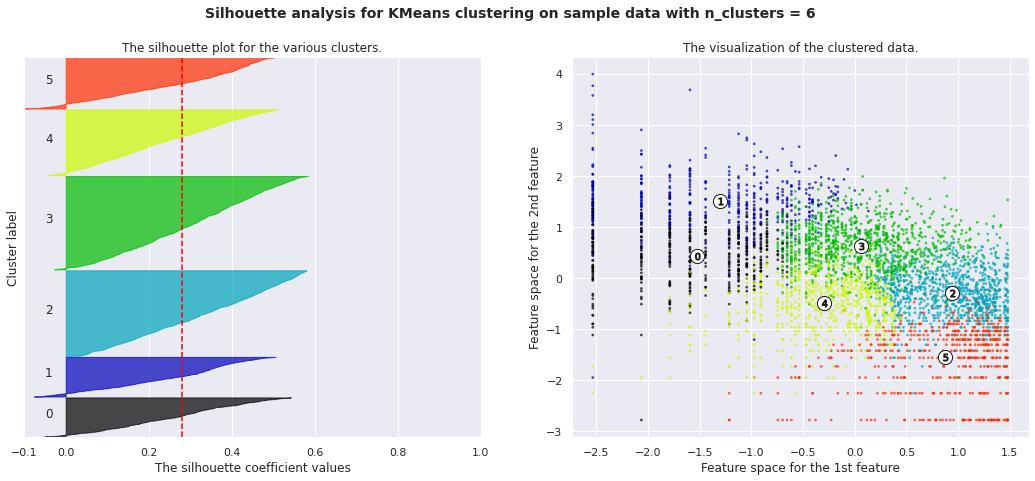

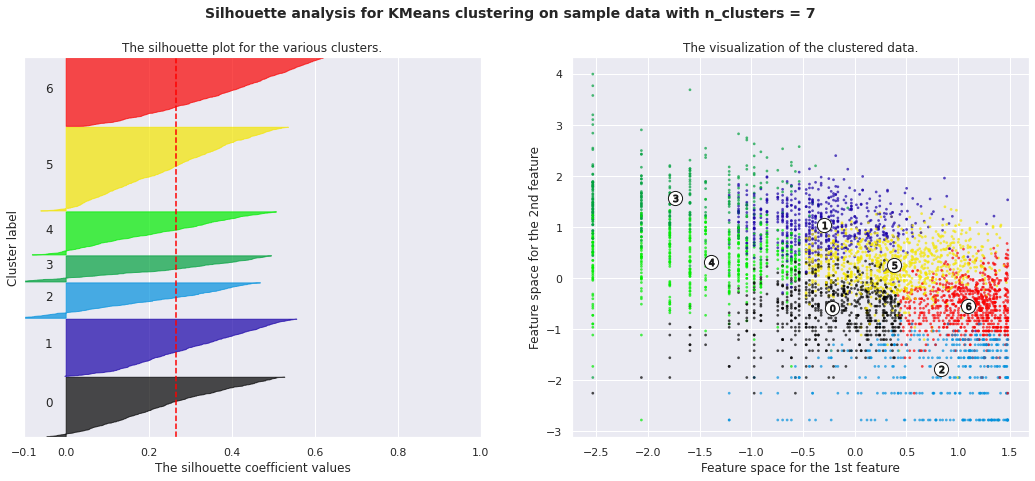

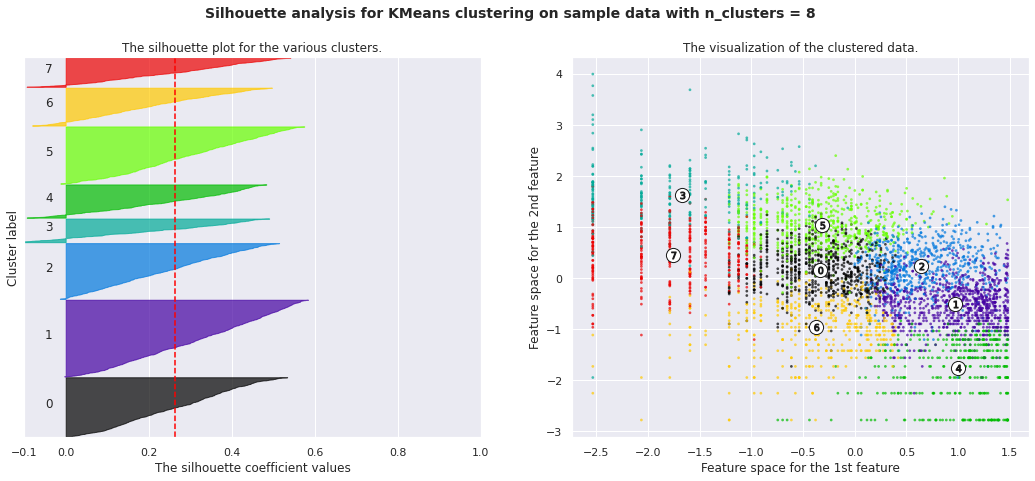

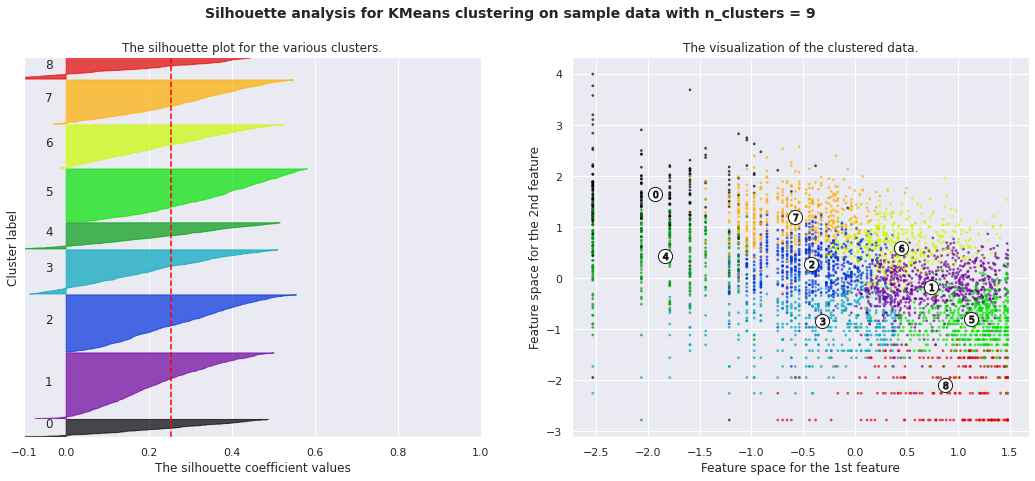

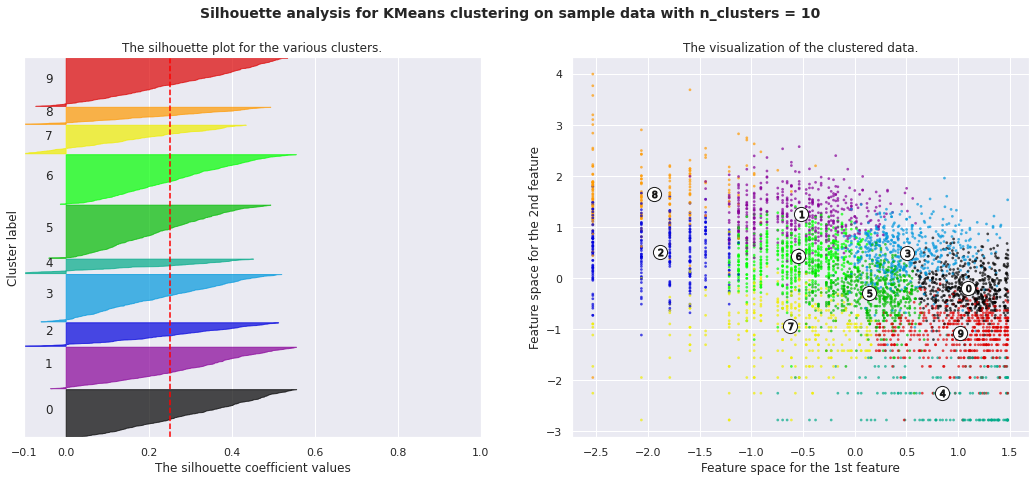

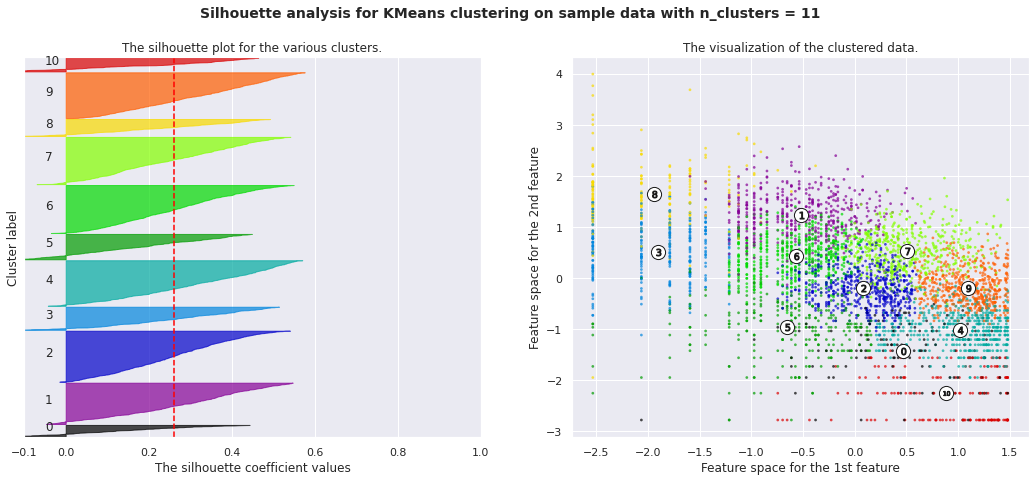

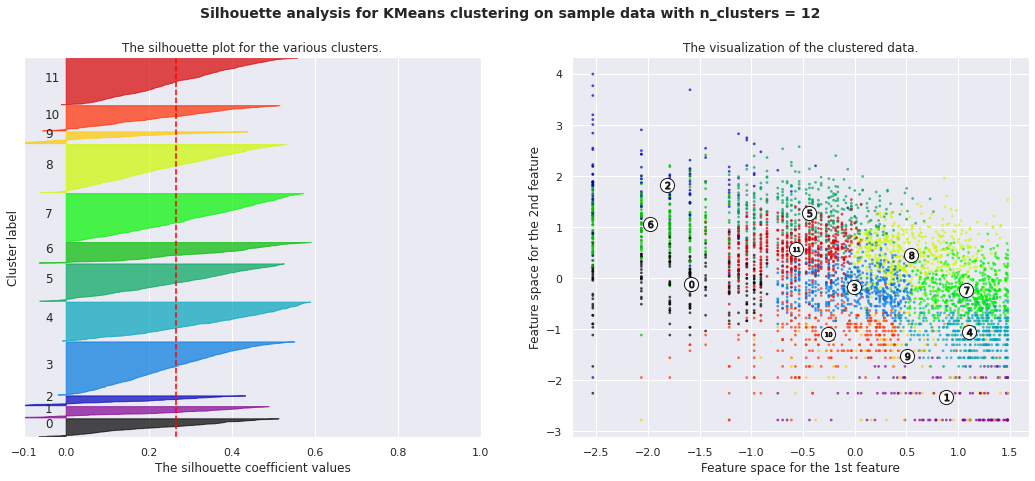

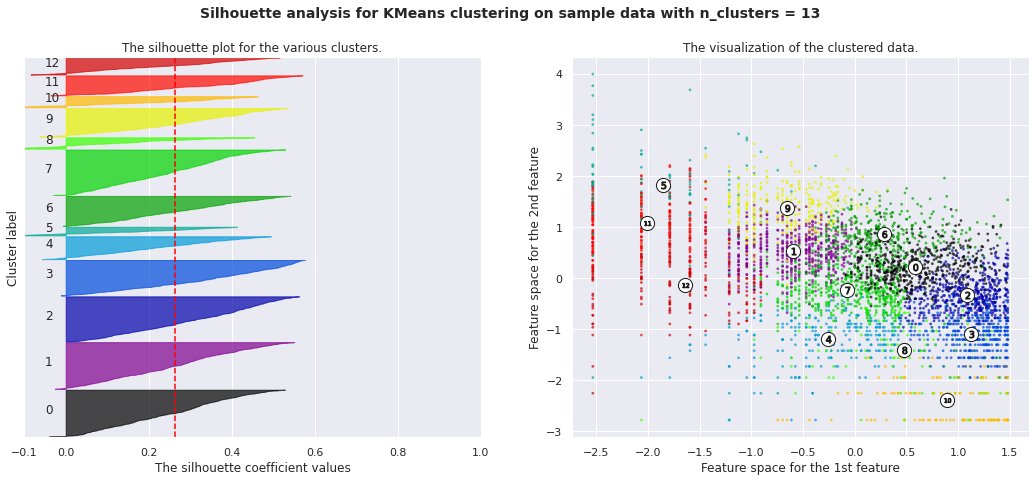

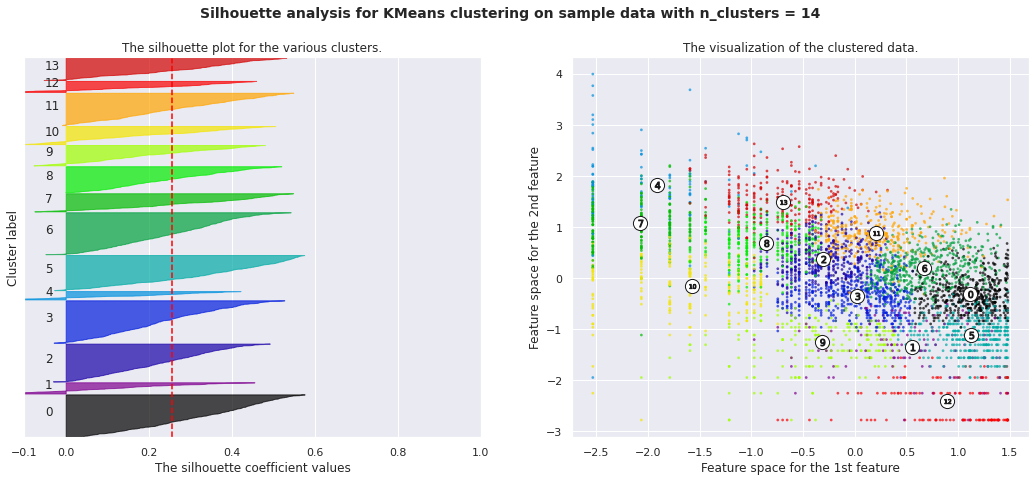

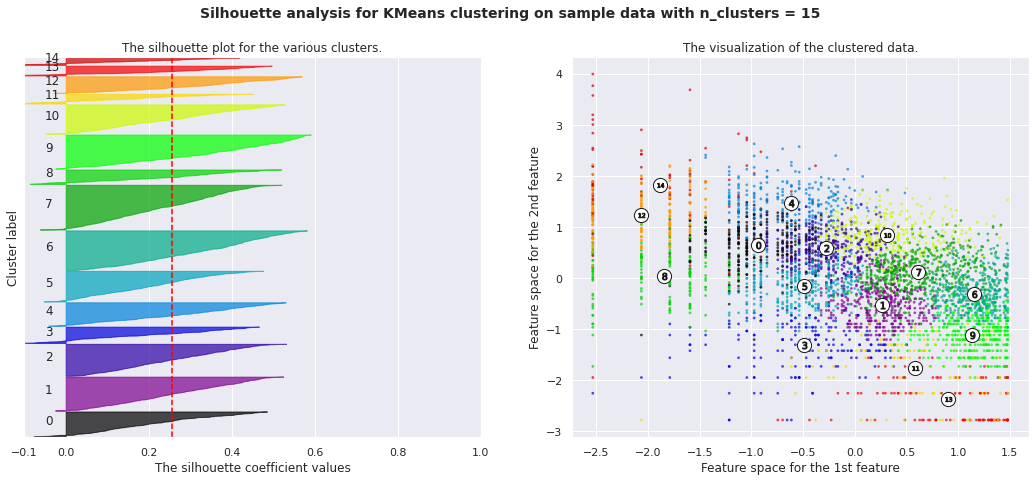

In [ ]:
import matplotlib.cm as cm
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

###**we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary**

#**Applying Elbow Method on Recency ,Frequency and Monetary**


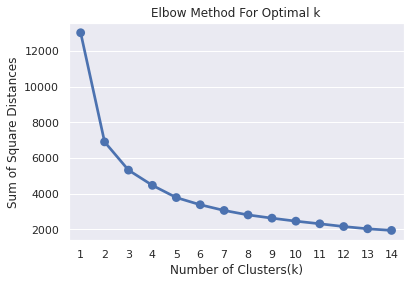

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:

#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        1  
12347.0        0.693147       5.204007      8.368693        0  
12348.0        4.317488       3.433987      7.494007        1  
12349.0        2.890372       4.290459      7.471676        0  
12350.0        5.736572       2.833213      5.812338        1  
12352.0        3.583519       4.442651      7.826459        0  
12353.0        5.318120       1.386294      4.488636        1  
12354.0        5.446737       4.060443      6.984161        1  
12355.0        5.365976       2.564949      6.129921        1  
12356.0        3.091042       4.077537      7.941449        0

#**Dendogram to find the optimal number of clusters**

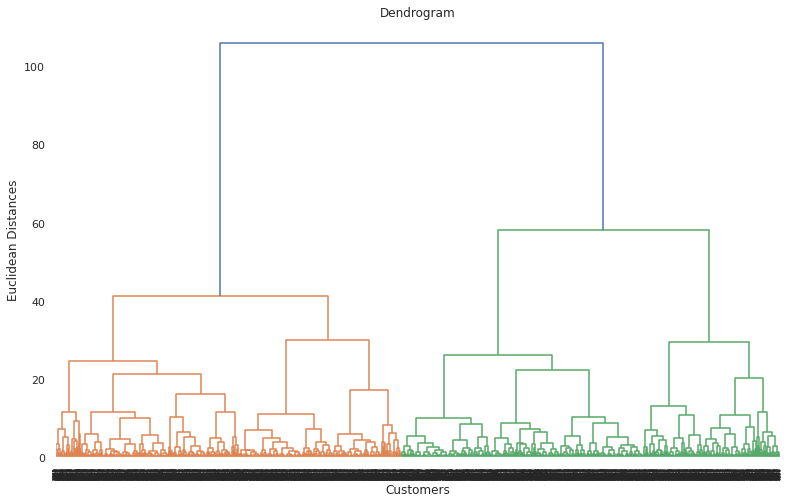

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

#**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90**

#**No. of Cluster = 2**

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

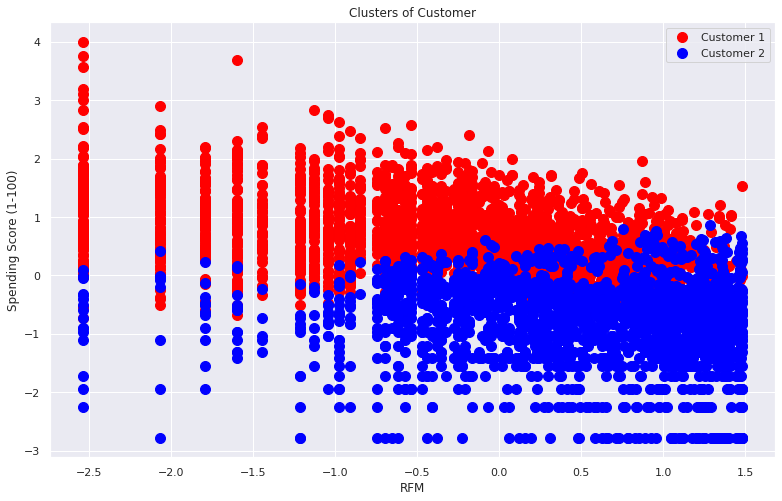

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#**By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 2**

#**Applying DBSCAN to Recency ,Frequency and Monetary**

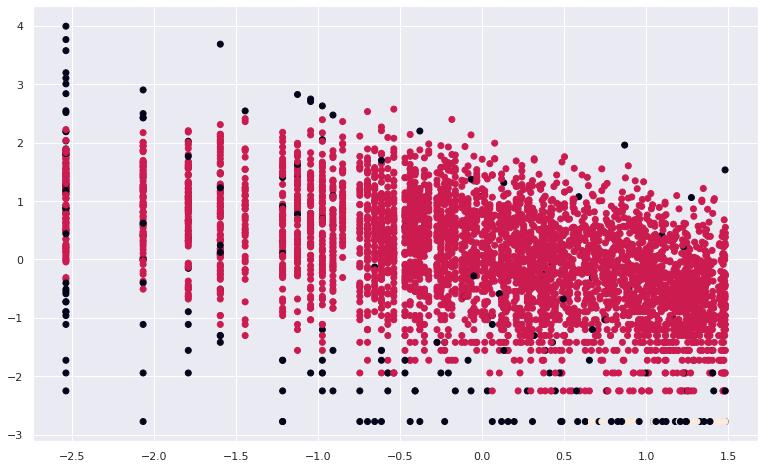

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

###**we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3**


#**Summary**

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  

 # Conclusion

  K-Mean Clustering
 
* Customers with Cluster Id 0 are the customers with high amount of transactions as compared to other customers.
* Customers with Cluster Id 2 are frequent buyers.
* Customers with Cluster Id 1 are not recent buyers and hence least of importance from business point of view.